## Import

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, NoSuchWindowException
import time
import os
import glob

## Download Data


In [363]:
def download(year):
    data_path= os.getcwd() + '/Data/'
    #path of Driver
    path_to_driver='/home/abhishek/Downloads/chromedriver_linux64/chromedriver'
    print(data_path)
    chrome_options = webdriver.ChromeOptions()
    prefs = {'download.default_directory' : data_path}
    chrome_options.add_experimental_option('prefs', prefs)
    browser = webdriver.Chrome(path_to_driver,options=chrome_options)

    browser.get('https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system')

    #Auth
    elementID=browser.find_element_by_id("dataset-resources")

    data = [i for i in elementID.find_elements_by_tag_name('li')]

    for i in range(len(data)):
        try:
            if int(data[i].text.split('\n')[0].split('-')[1].strip()) in year:
                print(int(data[i].text.split('\n')[0].split('-')[1].strip()))
                x=data[i].find_element_by_class_name('btn-group')
                link=x.find_elements_by_tag_name('a')[1].get_attribute('href')
                print(link)
                browser.get(link)
                time.sleep(10)
        except:
            pass
    return 'Download Completed'

In [364]:
#Enter the Years you want to Download
year = list(map(int,input("Enter Year:").split(' ')))

Enter Year:2018 2019


In [ ]:
download(year)

# Data Cleaning and Processing

In [174]:
#This Function clean the Data
def clean_df(i,df_path):
    
    #Read CSV
    df_ = pd.read_csv(df_path)    
    
    #Dropping Columns
    columns_to_drop = ['INCIDENT_NUMBER' ,'SHOOTING','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', 'OCCURRED_ON_DATE', 'YEAR',  'UCR_PART','Lat', 'Long', 'Location']
    df = df_.drop(columns_to_drop,axis = 1)
    
    #Droping Null Values
    nan_value = float("NaN")
    df.replace(" ", nan_value, inplace=True)
    
    
    df = df.dropna()
    
    #Change Month int to String
    df['MONTH'] = pd.to_datetime(df['MONTH'], format='%m').dt.month_name().str.slice(stop=3)
    

    #Remove Spaces from String
    #df.OFFENSE_CODE_GROUP = df.OFFENSE_CODE_GROUP.str.replace(' ','_')
    df.STREET = df.STREET.str.replace(' ','_')
    
    
    
    # dropping duplicate values
    df.drop_duplicates(keep='first',inplace=True)
    
    
    #Adding prefix
    
    df.OFFENSE_CODE = 'of_' + df['OFFENSE_CODE'].astype(str)
    df.REPORTING_AREA = 'ra_' + df['REPORTING_AREA'].astype(str)
    df.HOUR = 'hr_' + df['HOUR'].astype(str)
    df.DISTRICT = 'di_' + df['DISTRICT'].astype(str)
    df.MONTH = 'm_' + df['MONTH'].astype(str)
    df.DAY_OF_WEEK = 'dw_' + df['DAY_OF_WEEK'].astype(str)
    df.STREET = 'st_' + df['STREET'].astype(str)
    
    #Saving the files
    df.to_csv(f'./Clean_data/file{i}.txt',header=None, index=None, sep=' ')
    
    return df

In [175]:
import glob
df_paths =glob.glob('./Data/*')
for i,path in enumerate(df_paths):
    print(i,path)
    df=clean_df(i,path)
print('\n----Cleaning and Pre-processing Completed----')

0 ./Data/crime-incident-reports-2018.csv
1 ./Data/script_113631134_20210423192813_combine.csv

----Cleaning and Pre-processing Completed----


In [176]:
df.head()

OFFENSE_CODE     DISTRICT REPORTING_AREA  MONTH   DAY_OF_WEEK   HOUR  \
0      of_3125        di_A7         ra_465  m_Nov     dw_Friday  hr_20   
1      of_1107        di_A1          ra_77  m_Dec     dw_Sunday   hr_0   
2      of_1107       di_C11         ra_355  m_Dec    dw_Tuesday   hr_0   
4      of_1102       di_C11         ra_355  m_Oct  dw_Wednesday   hr_8   
5       of_735  di_External         ra_178  m_Oct   dw_Saturday   hr_0   

                STREET  
0     st_HARBORSIDE_DR  
1         st_NASSAU_ST  
2        st_LINDSEY_ST  
4          st_ADAMS_ST  
5  st_METROPOLITAN_AVE

#### Start Hadoop

In [23]:
!/home/hduser/hadoop-3.2.2/sbin/start-all.sh

Starting namenodes on [localhost]
Starting datanodes
Starting secondary namenodes [abhishek]
2021-06-29 20:19:21,123 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting resourcemanager
Starting nodemanagers


### Copy to Data to hdfs

In [178]:
!/home/hduser/hadoop-3.2.2/bin/hdfs dfs -mkdir /Data

2021-06-29 22:36:09,650 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [179]:
!/home/hduser/hadoop-3.2.2/bin/hdfs dfs -ls /

2021-06-29 22:36:12,785 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 5 items
drwxr-xr-x   - hduser supergroup          0 2021-06-29 22:36 /Data
drwxr-xr-x   - hduser supergroup          0 2021-06-29 21:25 /aprior_3
drwxr-xr-x   - hduser supergroup          0 2021-06-29 21:36 /apriori_model_1
drwx------   - hduser supergroup          0 2021-06-29 20:30 /tmp
drwxr-xr-x   - hduser supergroup          0 2021-06-29 20:30 /user


In [180]:
!/home/hduser/hadoop-3.2.2/bin/hdfs dfs -copyFromLocal /home/hduser/MapReduce/Clean_data/* /Data/

2021-06-29 22:36:16,923 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [181]:
!/home/hduser/hadoop-3.2.2/bin/hdfs dfs -ls /Data/

2021-06-29 22:36:18,844 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 2 items
-rw-r--r--   1 hduser supergroup    5368487 2021-06-29 22:36 /Data/file0.txt
-rw-r--r--   1 hduser supergroup    1065911 2021-06-29 22:36 /Data/file1.txt


# MapReduce Count

In [182]:
%%writefile ./src/mapper.py
#!/usr/bin/python
import sys

# dicitionary with unique products as keys
unique_product = {}


# input comes from STDIN (standard input)
for line in sys.stdin:
    basket = line.split() # each line is a record 
    basket_size = len(basket) # its size is the number value
    for product in basket:
        # If new value is found, add to dictionary
        if product not in unique_product.keys():
            # Value for each key is a duple
            unique_product[product] = [basket_size, 1]

        else: # if already included

            unique_product[product][0] = max(unique_product[product][0], 
                                             basket_size)
            # Increment number 
            unique_product[product][1] += 1


for product in unique_product.keys():
    print '{0}\t{1}'.format(product,'\t'.join(map(str, 
                                                  unique_product[product])))

Writing ./src/mapper.py


In [183]:
%%writefile ./src/reducer.py
#!/usr/bin/python
import sys

current_product = None
largest_basket_size = 0
sum_occurrences = 0
num_unique_products = 0

# input comes from STDIN (standard input)
for line in sys.stdin: # each line corresponds to a product

    product, basket_size, occurrences = line.split('\t', 2)

    if current_product == product:
        sum_occurrences += int(occurrences) # though we don't need to report it
        largest_basket_size = max(largest_basket_size, int(basket_size))

    else:
        num_unique_products += 1
        current_product = product
        sum_occurrences = int(occurrences) # though we don't need to report it
        largest_basket_size = max(largest_basket_size, int(basket_size))


Writing ./src/reducer.py


In [184]:
%%writefile ./src/combiner.py
#!/usr/bin/python
import sys

current_product = None
largest_basket_size = 0
sum_occurrences = 0

# input comes from STDIN (standard input)
for line in sys.stdin: # each line corresponds to a product


    product, basket_size, occurrences = line.split('\t', 2)

    if current_product == product:
        sum_occurrences += int(occurrences)
        largest_basket_size = max(largest_basket_size, int(basket_size))

    else:

        if current_product:
            print '{0}\t{1}\t{2}'.format(current_product, largest_basket_size, 
                                         sum_occurrences)
        current_product = product
        sum_occurrences = int(occurrences)
        largest_basket_size = int(basket_size)

if current_product == product:
    print '{0}\t{1}\t{2}'.format(current_product, largest_basket_size, 
                                 sum_occurrences)


Writing ./src/combiner.py


In [186]:
# Delete previous output
!chmod -R 777 /home/hduser/MapReduce/
!hdfs dfs -rm -r countProduct
# Hadoop streaming command
!hadoop jar /home/abhishek/Downloads/hadoop-streaming-3.2.2.jar \
    -D mapred.reduce.tasks=1 -mapper /home/hduser/MapReduce/src/mapper.py -combiner /home/hduser/MapReduce/src/combiner.py\
    -reducer /home/hduser/MapReduce/src/combiner.py -input /Data/* \
    -output countProduct

2021-06-29 22:39:50,442 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Deleted countProduct
2021-06-29 22:39:52,008 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/tmp/hadoop-unjar87811397892607127/] [] /tmp/streamjob3951526904681193941.jar tmpDir=null
2021-06-29 22:39:52,533 INFO client.RMProxy: Connecting to ResourceManager at /127.0.0.1:8032
2021-06-29 22:39:52,683 INFO client.RMProxy: Connecting to ResourceManager at /127.0.0.1:8032
2021-06-29 22:39:52,998 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/hduser/.staging/job_1624980160404_0013
2021-06-29 22:39:53,437 INFO mapred.FileInputFormat: Total input files to process : 2
2021-06-29 22:39:53,807 INFO mapreduce.JobSubmitter: number of splits:3
2021-06-29 22:39:53,914 INFO Configuration.deprecation: mapr

In [187]:
# Copy to local
!hdfs dfs -cat countProduct/part-00000 | head -n 20

2021-06-29 22:40:22,590 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
"	1	37
"st_100_ARCH_ST	7	2
"st_100_BOYLSTON_ST	7	1
"st_101_W_BROADWAY	7	33
"st_1060_MORTON_ST	7	1
"st_111_BRUNSWICK_ST	7	1
"st_112_HOMES_AVE	7	1
"st_1165_BLUE_HILL_AVE	7	31
"st_120_TREMONT_ST	7	1
"st_123_CAPEN_ST	7	1
"st_1249_HYDE_PARK_AVE	7	42
"st_1261_DORCHESTER_AVE	7	1
"st_1331_DORCHESTER_AVE	7	1
"st_133_THORNTON	7	1
"st_134_NORTHAMPTON_ST	7	1
"st_140_MAIN_ST	7	1
"st_141_MASSACHUSETTS_AVE	7	1
"st_144_MCBRIDE_ST	7	1
"st_146_PARSONS_ST	7	1
"st_1500_DORCHESTER_AVE	7	1
cat: Unable to write to output stream.


In [188]:
#Copy the data to local
!hdfs dfs -cat countProduct/part-00000* > /home/hduser/MapReduce/Results/count.txt

2021-06-29 22:40:24,504 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Analysis from MapReduce Count

In [189]:
#Read the count MapReduce
df_count = pd.read_csv('./Results/count.txt',delimiter='\t',names=['Name','Total Number','Count'])
df_count = df_count.drop('Total Number',axis =1)

df_max = df_count.sort_values('Count',ascending=False)
df_max.head()

Name  Count
475         di_B2  16790
485     dw_Friday  16376
486     dw_Monday  15897
491  dw_Wednesday  15832
489   dw_Thursday  15687

## Plotting Top 5 attributes value 

In [190]:
def df_plot(df,df_max):
    for i in df.columns:
        x = df[f'{i}'].unique()
        df_new = df_max.loc[df_max.Name.isin(x) ][:5]
        plt.figure(figsize=(12,5))
        plt.bar(df_new.Name,df_new.Count)
        plt.title(f"{i} vs No. of Cases")
        plt.show()

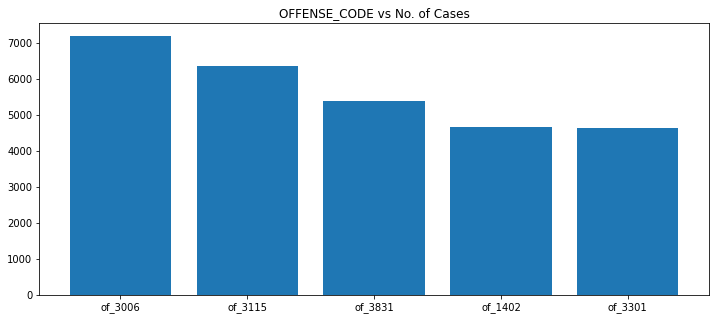

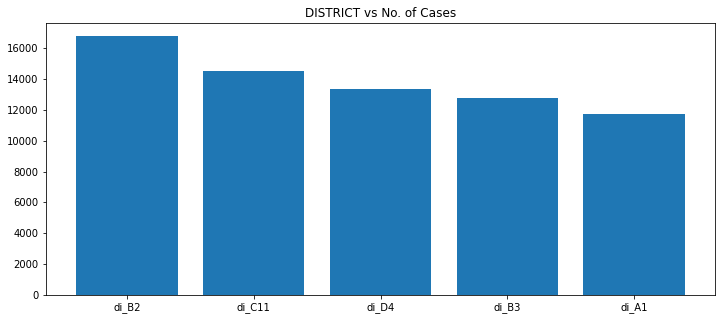

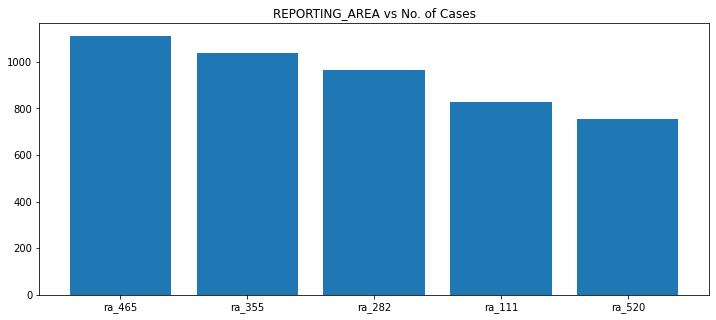

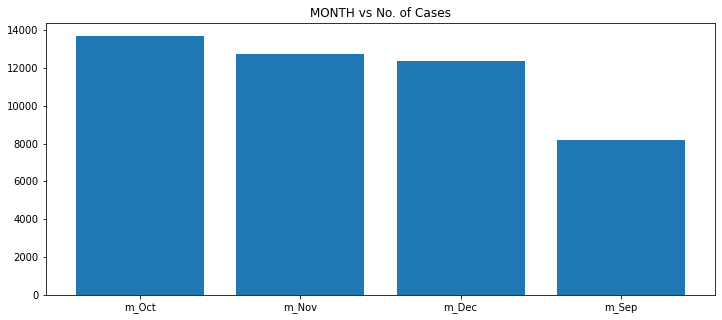

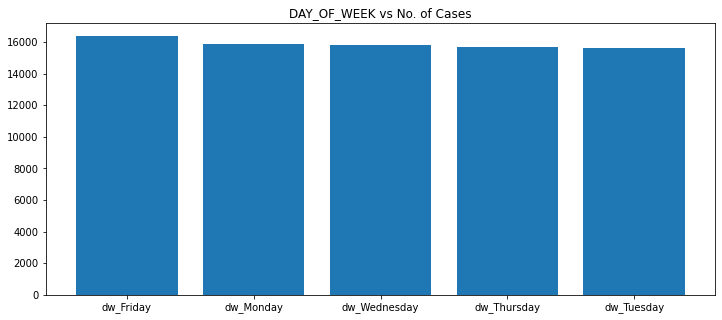

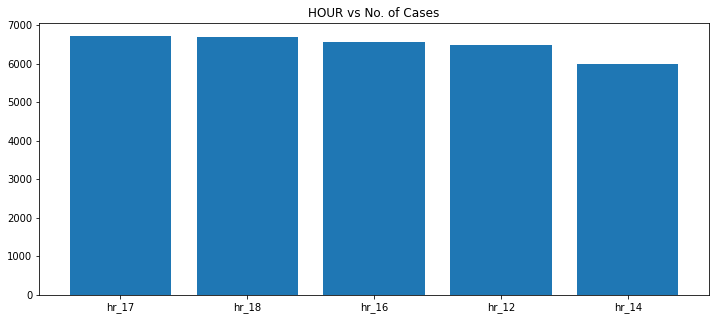

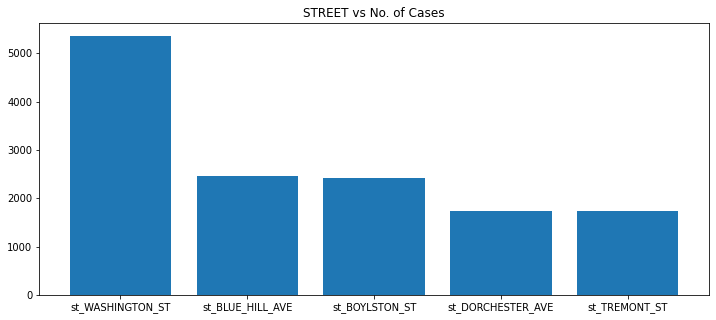

In [191]:
df_plot(df,df_max)

# Apriori MapReduce

In [192]:
%%writefile ./src/apriori_mapper.py
#!/usr/bin/env python
import itertools
import sys

item_count = int(sys.argv[1])
valid_items = set()

# If our item count is greater than 1, then load the corresponding model file
# indicating the items we should care about.

if item_count > 1:
    model_id = str(item_count - 1)

    # The first k items in each model row will correspond to the products. We
    # can build up the set of valid items simply by iterating over the model
    # and adding each of the elements in the first k columns.

    with open('apriori_model_' + model_id + '.txt') as model_file:
        for line in model_file:
            model_row = line.strip().split('\t')
            old_itemset = model_row[0:item_count - 1]
            valid_items.update(old_itemset)

"""
Emit all the itemsets for this basket.
"""
def emit_itemsets(basket):
    # First, we need to find out which items in the basket match the items
    # which we can accept in our k-itemsets. Note that we will accept every
    # item when the item count is 1.
    
    matching_items = []
    
    for item in basket:
        if item_count == 1 or item in valid_items:
            matching_items.append(item)
    
    # If we don't have enough items, we have no itemsets to emit.
    
    if len(matching_items) < item_count:
        return

    # Otherwise, emit all possible subsets. We'll use the pairs approach to
    # make things easier to read.
    
    for itemset in itertools.permutations(matching_items, item_count):
        print '\t'.join(itemset) + '\t1'
        
    # Also emit a counter for subcombinations so that we can create a
    # tally to use for computing confidence.

    if item_count > 1:
        for sub_itemset in itertools.permutations(matching_items, item_count - 1):
            print '\t'.join(sub_itemset) + '\t*\t1'
        
    # Finally, counter so that we can track the number of matching baskets.

    print ('*\t' * item_count) + str(1)
    
# Iterate over the baskets and emit the itemsets for each basket.

for line in sys.stdin:
    basket = line.strip().split(' ')
    emit_itemsets(basket)

Writing ./src/apriori_mapper.py


In [193]:
%%writefile ./src/apriori_reducer.py
#!/usr/bin/env python
import sys

support_threshold = int(sys.argv[1])

basket_count = 0
confidence_count = 0

current_itemset = None
current_count = 0

"""
Emit the current itemset and its count if they exceed support_threshold.
"""
def emit_count():

    # Declare that we want to use the global basket_count and confidence_count
    # variables rather than something local to the function.
    
    global basket_count, confidence_count
    
    # Check if we haven't started counting anything yet.
    
    if current_itemset is None:
        return

    # Check if we are computing the basket count from the sort operation.
    
    if current_itemset[0] == '*':
        basket_count = current_count
        return

    if current_itemset[-1] == '*':
        confidence_count = current_count
        return

    # Check if we have exceeded the necessary threshold.

    if current_count >= support_threshold:
        frequency = 1.0 * current_count / basket_count
        
        
        itemset_stats = str(current_count) + '\t' + str(frequency)
        
        if len(current_itemset) > 1:
            confidence = 1.0 * current_count / confidence_count
            itemset_stats += '\t' + str(confidence)
        
        print '\t'.join(current_itemset) + '\t' + itemset_stats

for line in sys.stdin:

    # Each line corresponds to the itemset stats. The last item will be a count
    # value, while the first items will be the itemset.
    
    itemset_stats = line.strip().split('\t')

    itemset = itemset_stats[0:-1]
    count = int(itemset_stats[-1])

    # If we haven't switched itemsets, continue accumulating the counter.
    
    if current_itemset == itemset:
        current_count += count
        continue

    # If we have switched itemsets, emit the count for the old itemset and then
    # switch to the new itemset.
        
    emit_count()
    current_itemset = itemset
    current_count = count

# We are guaranteed to not have printed the very last itemset, so emit it now.
    
emit_count()

Writing ./src/apriori_reducer.py


In [194]:

!cat ./Clean_data/file0.txt | python ./src/apriori_mapper.py 1 | sort -k1 | python ./src/apriori_reducer.py 100 > apriori_model_1.txt

In [198]:
!cat ./Clean_data/file0.txt | python ./src/apriori_mapper.py 2 | sort -k1 -k2 | python ./src/apriori_reducer.py 100 > apriori_model_2.txt

In [200]:
!cat ./Clean_data/file0.txt | ./src/apriori_mapper.py 3 | sort -k1 -k2 -k3 | python ./src/apriori_reducer.py 100 > apriori_model_3.txt

In [201]:
# Change permissions on mapper and reducer
!chmod -R 777 /home/hduser/MapReduce/
!chmod +x ./src/apriori_mapper.py
!chmod +x ./src/apriori_reducer.py


# If output folder already exists, delete it
!hdfs dfs -rm -r apriori_model_1

# Run job
!hadoop jar /home/abhishek/Downloads/hadoop-streaming-3.2.2.jar \
-D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapred.text.key.partitioner.options=-k1 \
-D stream.num.map.output.key.fields=3 \
-D mapred.text.key.comparator.options='-k1 -k2' \
-D mapred.reduce.tasks=1 \
-mapper '/home/hduser/MapReduce/src/apriori_mapper.py 1' \
-reducer '/home/hduser/MapReduce/src/apriori_reducer.py 100' \
-input /Data/* \
-output apriori_model_1

2021-06-29 22:43:22,947 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Deleted apriori_model_1
2021-06-29 22:43:24,553 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [/tmp/hadoop-unjar4252933239865173054/] [] /tmp/streamjob521930243030083170.jar tmpDir=null
2021-06-29 22:43:25,069 INFO client.RMProxy: Connecting to ResourceManager at /127.0.0.1:8032
2021-06-29 22:43:25,222 INFO client.RMProxy: Connecting to ResourceManager at /127.0.0.1:8032
2021-06-29 22:43:25,558 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/hduser/.staging/job_1624980160404_0014
2021-06-29 22:43:25,966 INFO mapred.FileInputFormat: Total input files to process : 2
2021-06-29 22:43:26,320 INFO mapreduce.JobSubmitter: number of splits:3
2021-06-29 22:43:26,442 INFO Configuration.deprecation: 

In [202]:
# Change permissions on mapper and reducer
!chmod -R 777 /home/hduser/MapReduce/

# If output folder already exists, delete it
!hdfs dfs -rm -r apriori_model_2

# Run job
!hadoop jar /home/abhishek/Downloads/hadoop-streaming-3.2.2.jar \
-D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapred.text.key.partitioner.options=-k1 \
-D stream.num.map.output.key.fields=3 \
-D mapred.text.key.comparator.options='-k1 -k2' \
-D mapred.reduce.tasks=1 \
-mapper '/home/hduser/MapReduce/src/apriori_mapper.py 2' \
-reducer '/home/hduser/MapReduce/src/apriori_reducer.py 100' \
-file apriori_model_1.txt \
-input /Data/file0.txt* \
-output apriori_model_2

2021-06-29 22:43:59,637 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Deleted apriori_model_2
2021-06-29 22:44:01,118 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
2021-06-29 22:44:01,223 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [apriori_model_1.txt, /tmp/hadoop-unjar2637366741680018612/] [] /tmp/streamjob2600735099656947823.jar tmpDir=null
2021-06-29 22:44:02,142 INFO client.RMProxy: Connecting to ResourceManager at /127.0.0.1:8032
2021-06-29 22:44:02,307 INFO client.RMProxy: Connecting to ResourceManager at /127.0.0.1:8032
2021-06-29 22:44:02,770 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/hduser/.staging/job_1624980160404_0015
2021-06-29 22:44:03,517 INFO mapred.FileInputFormat: Total input files t

In [203]:
# If output folder already exists, delete it
!hdfs dfs -rm -r apriori_model_3

# Run job
!hadoop jar /home/abhishek/Downloads/hadoop-streaming-3.2.2.jar \
-D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D mapred.text.key.partitioner.options=-k1 \
-D stream.num.map.output.key.fields=3 \
-D mapred.text.key.comparator.options='-k1 -k2 -k3' \
-D mapred.reduce.tasks=1 \
-mapper '/home/hduser/MapReduce/src/apriori_mapper.py 3' \
-reducer '/home/hduser/MapReduce/src/apriori_reducer.py 100' \
-file apriori_model_2.txt \
-input /Data/file0.txt* \
-output apriori_model_3

2021-06-29 22:45:02,248 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Deleted apriori_model_3
2021-06-29 22:45:03,656 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
2021-06-29 22:45:03,763 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
packageJobJar: [apriori_model_2.txt, /tmp/hadoop-unjar1155913636850216749/] [] /tmp/streamjob106987134103996658.jar tmpDir=null
2021-06-29 22:45:04,344 INFO client.RMProxy: Connecting to ResourceManager at /127.0.0.1:8032
2021-06-29 22:45:04,498 INFO client.RMProxy: Connecting to ResourceManager at /127.0.0.1:8032
2021-06-29 22:45:04,781 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/hduser/.staging/job_1624980160404_0016
2021-06-29 22:45:05,440 INFO mapred.FileInputFormat: Total input files to

In [206]:
!hdfs dfs -cat apriori_model_2/part-00000* > /home/hduser/MapReduce/Results/apriori_with_2attributes.txt

2021-06-29 22:47:24,967 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [208]:
!hdfs dfs -cat apriori_model_3/part-00000* > /home/hduser/MapReduce/Results/apriori_with_3attributes.txt

2021-06-29 22:47:42,825 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Two variables

In [209]:
df_ap2 = pd.read_csv('./Results/apriori_with_2attributes.txt',sep='	', engine='python',names=['variable1','variable2','Count','Confidence1','Confidence2'])
df_ap2 = df_ap2.loc[df_ap2.Confidence2 == 1]
df_ap2.sort_values('Count',ascending=False)

variable1 variable2  Count  Confidence1  Confidence2
5221    st_DUDLEY_ST     di_B2    720     0.007917          1.0
4776          ra_329     di_B2    581     0.006389          1.0
4930          ra_624     di_D4    541     0.005949          1.0
4640          ra_143     di_D4    523     0.005751          1.0
4869          ra_465     di_B3    495     0.005443          1.0
...              ...       ...    ...          ...          ...
4916          ra_594     di_D4    101     0.001111          1.0
4917          ra_602     di_B2    101     0.001111          1.0
5232  st_E_FOURTH_ST     di_C6    101     0.001111          1.0
4620          ra_125     di_A1    100     0.001100          1.0
5314    st_MARKET_ST    di_D14    100     0.001100          1.0

[300 rows x 5 columns]

### Three variables

In [229]:
#Read the count MapReduce
df_ap3 = pd.read_csv('./Results/apriori_with_3attributes.txt',sep='	', engine='python',names=['variable1','variable2','variable3','Count','Confidence1','Confidence2'])
df_ap3=df_ap3.drop('Confidence1',axis=1)
df_ap3 = df_ap3.loc[df_ap3.Confidence2 == 1]
df_ap3.sort_values('Count',ascending=False)

variable1         variable2 variable3  Count  Confidence2
4664            ra_143    st_BOYLSTON_ST     di_D4    365          1.0
4936    st_BOYLSTON_ST            ra_143     di_D4    365          1.0
5066  st_HYDE_PARK_AVE            ra_520    di_E18    341          1.0
4754            ra_520  st_HYDE_PARK_AVE    di_E18    341          1.0
4745            ra_465  st_BLUE_HILL_AVE     di_B3    299          1.0
...                ...               ...       ...    ...          ...
4669            ra_168  st_WASHINGTON_ST     di_D4    102          1.0
4463           of_3114            ra_520    di_E18    101          1.0
4752            ra_520           of_3114    di_E18    101          1.0
4719            ra_329       st_DEVON_ST     di_B2    101          1.0
4971       st_DEVON_ST            ra_329     di_B2    101          1.0

[174 rows x 5 columns]

# Analysis

In [223]:
df.head()

OFFENSE_CODE     DISTRICT REPORTING_AREA  MONTH   DAY_OF_WEEK   HOUR  \
0      of_3125        di_A7         ra_465  m_Nov     dw_Friday  hr_20   
1      of_1107        di_A1          ra_77  m_Dec     dw_Sunday   hr_0   
2      of_1107       di_C11         ra_355  m_Dec    dw_Tuesday   hr_0   
4      of_1102       di_C11         ra_355  m_Oct  dw_Wednesday   hr_8   
5       of_735  di_External         ra_178  m_Oct   dw_Saturday   hr_0   

                STREET  
0     st_HARBORSIDE_DR  
1         st_NASSAU_ST  
2        st_LINDSEY_ST  
4          st_ADAMS_ST  
5  st_METROPOLITAN_AVE

In [366]:
df_of=df_ap3[df_ap3.variable1.str.startswith(tuple('of'))]
df_of= df_of.sort_values('Count',ascending=False)
df_dw=df_ap3[df_ap3.variable2.str.startswith(tuple('dw'))]
df_dw= df_dw.sort_values('Count',ascending=False)
df_dx=df_ap3[df_ap3.variable3.str.startswith(tuple('st'))]
df_dx= df_dx.sort_values('Count',ascending=False)

In [367]:
df_of

variable1                    variable2 variable3  Count  Confidence2
4580    of_613                       ra_134     di_D4    145          1.0
4582    of_613                       ra_143     di_D4    141          1.0
4584    of_613                        ra_94     di_A1    129          1.0
4465   of_3114                        ra_61     di_A1    128          1.0
4581    of_613                       ra_138     di_D4    113          1.0
4587    of_613  st_FANEUIL_HALL_MARKETPLACE     di_A1    105          1.0
4463   of_3114                       ra_520    di_E18    101          1.0

In [368]:
df_of.value_counts()

variable1  variable2                    variable3  Count  Confidence2
of_3114    ra_520                       di_E18     101    1.0            1
           ra_61                        di_A1      128    1.0            1
of_613     ra_134                       di_D4      145    1.0            1
           ra_138                       di_D4      113    1.0            1
           ra_143                       di_D4      141    1.0            1
           ra_94                        di_A1      129    1.0            1
           st_FANEUIL_HALL_MARKETPLACE  di_A1      105    1.0            1
dtype: int64

In [369]:
df_dw.value_counts()

variable1          variable2     variable3       Count  Confidence2
ra_111             dw_Friday     di_A1           105    1.0            1
ra_186             di_B2         st_ALLSTATE_RD  103    1.0            1
ra_691             di_B2         st_CENTRE_ST    130    1.0            1
st_ALLSTATE_RD     di_B2         ra_186          103    1.0            1
                   di_E5         ra_713          160    1.0            1
st_DUDLEY_ST       dw_Friday     di_B2           111    1.0            1
                   dw_Monday     di_B2           120    1.0            1
                   dw_Tuesday    di_B2           103    1.0            1
                   dw_Wednesday  di_B2           107    1.0            1
st_GREENVILLE_ST   di_C11        ra_345          145    1.0            1
st_HARRISON_AVE    di_C11        ra_395          132    1.0            1
st_HUNTINGTON_AVE  di_C6         ra_179          125    1.0            1
st_LEGENDS_WAY     di_A1         ra_61           179    

In [370]:
df_dx.value_counts()

variable1  variable2  variable3       Count  Confidence2
di_B2      ra_186     st_ALLSTATE_RD  103    1.0            1
           ra_691     st_CENTRE_ST    130    1.0            1
ra_186     di_B2      st_ALLSTATE_RD  103    1.0            1
ra_691     di_B2      st_CENTRE_ST    130    1.0            1
dtype: int64

# Results 
* **of_613** i.e. LARCENY SHOPLIFTING is very common on **District D4 and A1**
* **District B3** has most cases from **Street ALLSTATE_RD and CENTRE_ST**
* **Street DUDLEY_ST** has most reported cases on **Friday Tuesday Wednesday**